In [1]:
import librosa

In [20]:
signal,samplerate = librosa.load("F:/Languages/hindi_20/hindi14.wav")

In [4]:
import matplotlib.pyplot as plt

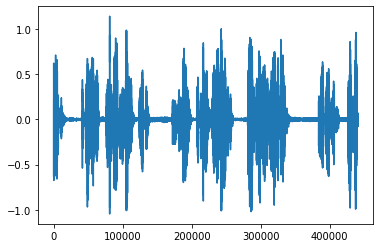

In [21]:
plt.plot(signal)

In [8]:
import numpy as np
import math

In [22]:
RMS  = math.sqrt(np.mean(signal**2))

In [23]:
samplerate

22050

In [24]:
def create_white_noise(signal,SNR):
    RMS_signal = math.sqrt(np.mean(signal**2))
    RMS_noise = math.sqrt(RMS_signal**2/(pow(10,SNR/20)))
    STD_noise = RMS_noise
    noise = np.random.normal(0,STD_noise,signal.shape[0])
    return noise
    

In [25]:
def get_noise_from_sound(signal,noise,SNR):
    RMS_s = math.sqrt(np.mean(signal**2))
    RMS_noise = math.sqrt(RMS_signal**2/(pow(10,SNR/20)))
    RMS_current_noise = math.sqrt(np.mean(noise**2))
    noise = noise*(RMS_noise/RMS_current_noise)
    return noise

    

In [26]:
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

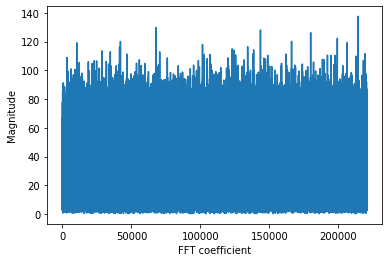

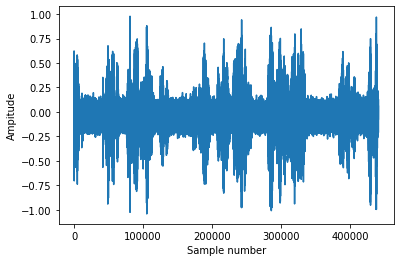

In [29]:
signal = np.interp(signal,(signal.min(),signal.max()),(-1,1))
noise = create_white_noise(signal,SNR=10)
X = np.fft.rfft(noise)
radius,angle = to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()
signal_noise = signal+noise
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Ampitude")
plt.show()


In [30]:
from scipy.io.wavfile import write
write("F:/Languages/hindinoiseadded.wav",samplerate,signal_noise)